# Exploration of Hugging Face Library
- Pipeline
- AutoTokenizer, AutoModel, AutoConfig

In [1]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification, AutoConfig, AutoModel
import torch
import torch.nn as nn

## Using Pipeline

In [2]:
# Create Pipeline object
sentiment_classifier = pipeline('sentiment-analysis')
text = ['I Love coding', 'I Hate to remember syntax']
print(sentiment_classifier(text))

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9996923208236694}, {'label': 'NEGATIVE', 'score': 0.9992707371711731}]


## AutoTokenizer and Auto Model
### Modeling a sentiment analysis pipeline with individual steps


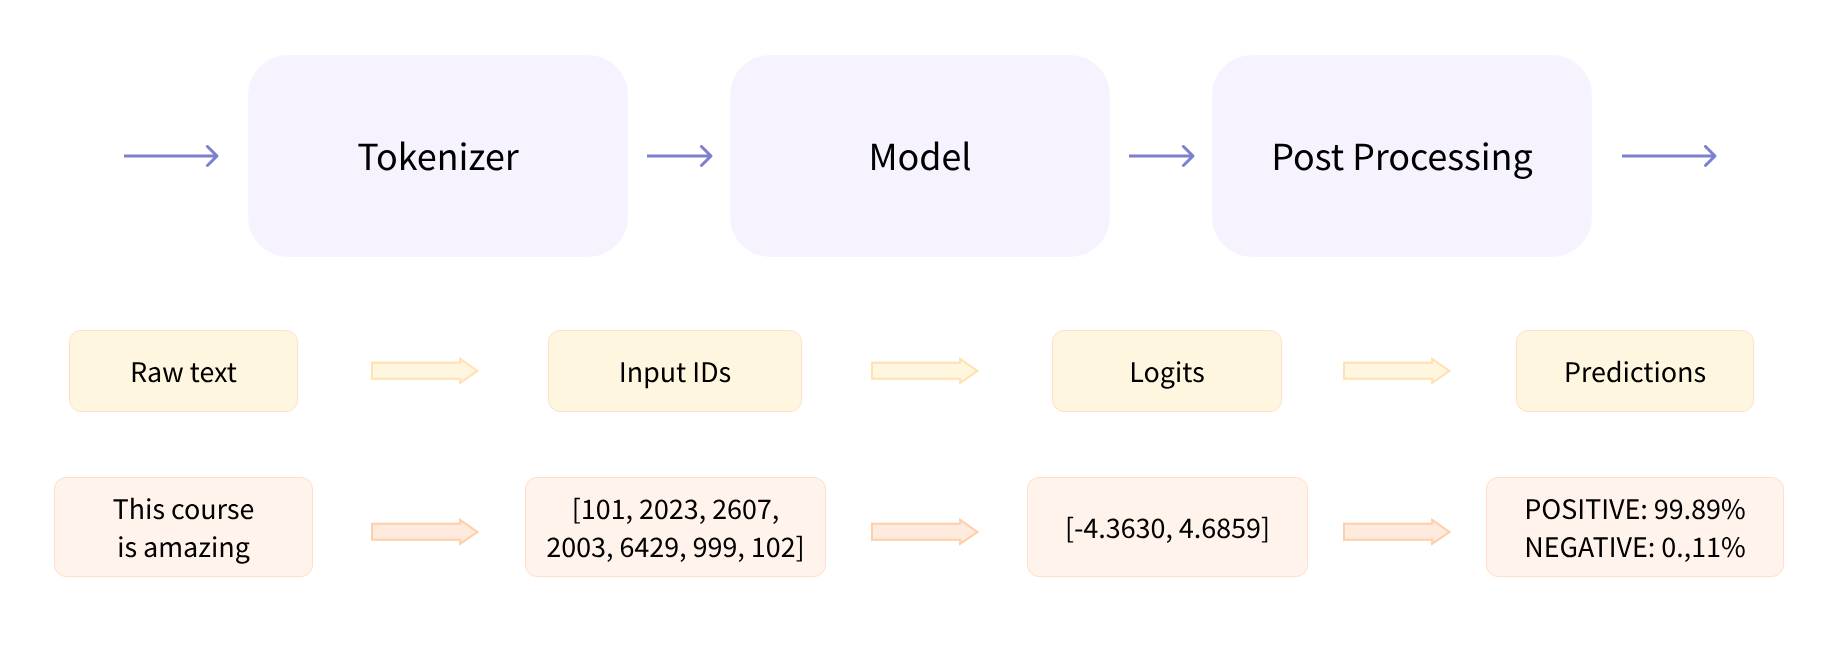


Tokenization Step
- Splitting the input into words, subwords, or symbols (like punctuation) thatb are called tokens
- Mapping each token to an integer
- Adding additional inputs that may be useful to the model

In [3]:
# Tokenization
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

token_words = tokenizer.tokenize(text) # Only tokenizes the text in to words/subwords depending on tokrnizer used
token_ids = tokenizer.convert_tokens_to_ids(token_words) # Converts token words to ids
token_decoded = tokenizer.decode(token_ids) # Decoding token ids back to words

tokens_tensors = tokenizer(text, padding=True, truncation = True, return_tensors="pt") # Tokenizes the words converts to ids representing vocab and tensors

print(token_words,'\n', token_ids, '\n', token_decoded, '\n\n', tokens_tensors)

['i', 'love', 'coding', 'i', 'hate', 'to', 'remember', 'syntax'] 
 [1045, 2293, 16861, 1045, 5223, 2000, 3342, 20231] 
 i love coding i hate to remember syntax 

 {'input_ids': tensor([[  101,  1045,  2293, 16861,   102,     0,     0],
        [  101,  1045,  5223,  2000,  3342, 20231,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1]])}


In [6]:
# Sentiment classification model using Automodel (which loads pre-trained model) followed by Softmax
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
output = model(**tokens_tensors) # Unpacking dictionary arguments into function arguments
sentiment_probablities = torch.nn.functional.softmax(output.logits,dim = -1)
print(sentiment_probablities)

tensor([[3.0769e-04, 9.9969e-01],
        [9.9927e-01, 7.2930e-04]], grad_fn=<SoftmaxBackward0>)


## AutoConfig
Using Autoconfig to load models with blueprint provided by config file and they are randomly initialized

In [7]:
model_config = AutoConfig.from_pretrained('openai-gpt',n_layer = 10)
print(model_config)
gpt_model = AutoModel.from_config(model_config)
print(gpt_model)

config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

OpenAIGPTConfig {
  "_name_or_path": "openai-gpt",
  "afn": "gelu",
  "architectures": [
    "OpenAIGPTLMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "embd_pdrop": 0.1,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "openai-gpt",
  "n_ctx": 512,
  "n_embd": 768,
  "n_head": 12,
  "n_layer": 10,
  "n_positions": 512,
  "n_special": 0,
  "predict_special_tokens": true,
  "resid_pdrop": 0.1,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.35.2",
  "vocab_size": 40478
}

OpenAIGPTModel(
  (tokens_embed): Embedding(40478, 768)
  (positions_embed): Embedding(512, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-9): 10 x Block(
      (attn): Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()

In [8]:
model_config = AutoConfig.from_pretrained('gpt2-large')
print(model_config)
gpt_model = AutoModel.from_config(model_config)
print(gpt_model)

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

GPT2Config {
  "_name_or_path": "gpt2-large",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 1280,
  "n_head": 20,
  "n_inner": null,
  "n_layer": 36,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.35.2",
  "use_cache": true,
  "vocab_size": 50257
}

GPT2Model(
  (wte): Embedding(50257, 1280)
  (wpe): Embedding(1024, 1280)
  (drop): Dropout(p=0.1, inp

## Saving trained model
- config.json contains attributes necessary for model architecture and metadata about checkpoint
- model.safetensors contains model's tuned weights

In [9]:
model.save_pretrained("distilbert-semantic_classification")

In [10]:
ls distilbert-semantic_classification/

config.json  model.safetensors


## Handling multiple sequence

In [31]:
# Tokenization and classification with individiual sentences
token1 = tokenizer.tokenize(text[0])
token2 = tokenizer.tokenize(text[1])
id1 = tokenizer.convert_tokens_to_ids(token1)
id2 = tokenizer.convert_tokens_to_ids(token2)
tensor1 = torch.tensor([id1])
tensor2 = torch.tensor([id2])
out1 = model(tensor1).logits
out2 = model(tensor2).logits


# Tokenization and classification together
tensor = tokenizer(text, padding=True, truncation = True, return_tensors="pt") # Returns pytorch tensors
out = model(**tensor).logits
print(token1, token2,'\n\n', id1, id2,'\n\n', tensor1, tensor2, tensor, '\n\n', out1, out2, out)
#torch.tensor(seq1)

['i', 'love', 'coding'] ['i', 'hate', 'to', 'remember', 'syntax'] 

 [1045, 2293, 16861] [1045, 5223, 2000, 3342, 20231] 

 tensor([[ 1045,  2293, 16861]]) tensor([[ 1045,  5223,  2000,  3342, 20231]]) {'input_ids': tensor([[  101,  1045,  2293, 16861,   102,     0,     0],
        [  101,  1045,  5223,  2000,  3342, 20231,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1]])} 

 tensor([[-1.6383,  1.7355]], grad_fn=<AddmmBackward0>) tensor([[ 0.6848, -0.3811]], grad_fn=<AddmmBackward0>) tensor([[-3.9137,  4.1724],
        [ 3.9750, -3.2477]], grad_fn=<AddmmBackward0>)
